In [4]:
from langgraph.graph import StateGraph, START, END
from dotenv import load_dotenv
from typing import TypedDict
from langchain_anthropic import ChatAnthropic

In [2]:
load_dotenv()

True

In [5]:
llm = ChatAnthropic(model_name='claude-3-5-sonnet-20241022', streaming=True)

In [3]:
class BlogState(TypedDict):
    title: str
    outline: str
    blog: str

In [15]:
def create_outline(state: BlogState)-> BlogState:
    title = state['title']

    outline = llm.invoke(f'Generate a detailed outline on the following topic:  {title}')

    state['outline'] = outline

    return state


def blog_generator(state: BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']

    blog = llm.invoke(f'Generate a blog on the following topic under 500 words:\n  {title}.\n Using the given ouline\n {outline}')

    state['blog'] = blog

    return state

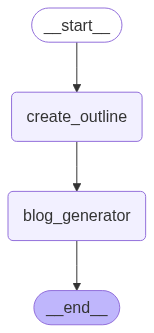

In [16]:
graph = StateGraph(BlogState)

graph.add_node('create_outline', create_outline)
graph.add_node('blog_generator', blog_generator)

graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'blog_generator')
graph.add_edge('blog_generator', END)

workflow = graph.compile()
workflow

In [17]:
initial_state = {'title': 'women Empowerment'}
blog = workflow.invoke(initial_state)

In [18]:
blog

{'title': 'women Empowerment',
 'outline': AIMessage(content="Here's a detailed outline on Women Empowerment:\n\nI. Introduction\n   A. Definition of women empowerment\n   B. Historical context\n   C. Importance in modern society\n\nII. Key Aspects of Women Empowerment\n    A. Educational empowerment\n       1. Access to education\n       2. Quality education\n       3. Higher education opportunities\n       4. Skill development\n\n    B. Economic empowerment\n       1. Employment opportunities\n       2. Equal pay\n       3. Financial literacy\n       4. Entrepreneurship\n       5. Access to credit and resources\n\n    C. Political empowerment\n       1. Voting rights\n       2. Political representation\n       3. Leadership positions\n       4. Policy-making involvement\n\n    D. Social empowerment\n       1. Decision-making authority\n       2. Freedom of choice\n       3. Social mobility\n       4. Cultural rights\n\nIII. Challenges to Women Empowerment\n     A. Gender discriminati

In [20]:
blog['outline'].content

"Here's a detailed outline on Women Empowerment:\n\nI. Introduction\n   A. Definition of women empowerment\n   B. Historical context\n   C. Importance in modern society\n\nII. Key Aspects of Women Empowerment\n    A. Educational empowerment\n       1. Access to education\n       2. Quality education\n       3. Higher education opportunities\n       4. Skill development\n\n    B. Economic empowerment\n       1. Employment opportunities\n       2. Equal pay\n       3. Financial literacy\n       4. Entrepreneurship\n       5. Access to credit and resources\n\n    C. Political empowerment\n       1. Voting rights\n       2. Political representation\n       3. Leadership positions\n       4. Policy-making involvement\n\n    D. Social empowerment\n       1. Decision-making authority\n       2. Freedom of choice\n       3. Social mobility\n       4. Cultural rights\n\nIII. Challenges to Women Empowerment\n     A. Gender discrimination\n     B. Cultural barriers\n     C. Economic inequality\n 

In [22]:
blog['blog'].content

"Women Empowerment: A Path to Global Progress\n\nWomen empowerment represents one of the most crucial social movements of our time, focusing on providing women with the power to control their own destinies and contribute equally to society. Throughout history, women have faced numerous challenges and limitations, but the modern era has witnessed significant strides toward gender equality and women's rights.\n\nAt its core, women empowerment encompasses several key dimensions. Educational empowerment stands as the foundation, providing women with access to quality education and skill development opportunities. When girls receive education, they gain the knowledge and confidence needed to pursue their dreams and make informed decisions about their lives.\n\nEconomic empowerment plays an equally vital role. Despite progress, women continue to face workplace discrimination, wage gaps, and limited access to financial resources. Promoting equal pay, supporting women entrepreneurs, and ensuri